In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_pickle('trainReduced')

In [3]:
data.head()

,qid,question_text,target
1230084,f10da363cb457e4c60c3,Is there any way I can play videos from Google...,0
1236209,f242c600958872ff5b2f,How do I make it say a certain date on ’their ...,0
1084571,d48b89e2d8713c72c1cb,Which is the best company for regular rolled o...,0
598192,752aba52e05a2c7e7f46,How can a Nepali worker from Malaysia go to Si...,0
864468,a9623a55b06591fb6568,What does it mean when a girl challenges you?,0


In [4]:
# reseting indexing and removing qid
data = data.set_index(np.arange(0,len(data))).loc[:,['question_text','target']]

In [5]:
data.head()

,question_text,target
0,Is there any way I can play videos from Google...,0
1,How do I make it say a certain date on ’their ...,0
2,Which is the best company for regular rolled o...,0
3,How can a Nepali worker from Malaysia go to Si...,0
4,What does it mean when a girl challenges you?,0


# Tokenizing
 Using regex tokenizer - all except letters and numbers is removed.

### Single words

In [6]:
import nltk

In [13]:
tok = nltk.RegexpTokenizer('\w+')

In [252]:
tokens = []
for i in data.iloc[:,0]:
    tokens.append(tok.tokenize(i))

In [254]:
#questions
for i in data.iloc[0:5,0]:
    print(i)

Is there any way I can play videos from Google Drive on a VLC media player on Android? Preferably, Google Drive videos that I store locally, too.
How do I make it say a certain date on ’their notifications?
Which is the best company for regular rolled oats?
How can a Nepali worker from Malaysia go to Singapore for work?
What does it mean when a girl challenges you?


In [256]:
#only single words are kept
print(tokens[0:5])

[['Is', 'there', 'any', 'way', 'I', 'can', 'play', 'videos', 'from', 'Google', 'Drive', 'on', 'a', 'VLC', 'media', 'player', 'on', 'Android', 'Preferably', 'Google', 'Drive', 'videos', 'that', 'I', 'store', 'locally', 'too'], ['How', 'do', 'I', 'make', 'it', 'say', 'a', 'certain', 'date', 'on', 'their', 'notifications'], ['Which', 'is', 'the', 'best', 'company', 'for', 'regular', 'rolled', 'oats'], ['How', 'can', 'a', 'Nepali', 'worker', 'from', 'Malaysia', 'go', 'to', 'Singapore', 'for', 'work'], ['What', 'does', 'it', 'mean', 'when', 'a', 'girl', 'challenges', 'you']]


In [265]:
#getting all tokens into single list, lowercased
tokens2 = []
for i in tokens:
    for j in i:
        tokens2.append(j.lower())

In [275]:
print(tokens2[0:50])
print(len(tokens2))

['is', 'there', 'any', 'way', 'i', 'can', 'play', 'videos', 'from', 'google', 'drive', 'on', 'a', 'vlc', 'media', 'player', 'on', 'android', 'preferably', 'google', 'drive', 'videos', 'that', 'i', 'store', 'locally', 'too', 'how', 'do', 'i', 'make', 'it', 'say', 'a', 'certain', 'date', 'on', 'their', 'notifications', 'which', 'is', 'the', 'best', 'company', 'for', 'regular', 'rolled', 'oats', 'how', 'can']
2603098


In [270]:
#removing stopwords
from nltk.corpus import stopwords
tokens3 = []
for i in tokens2:
    if i not in stopwords.words('english'):
        tokens3.append(i)

In [274]:
print(tokens3[0:50])
print(len(tokens3))

['way', 'play', 'videos', 'google', 'drive', 'vlc', 'media', 'player', 'android', 'preferably', 'google', 'drive', 'videos', 'store', 'locally', 'make', 'say', 'certain', 'date', 'notifications', 'best', 'company', 'regular', 'rolled', 'oats', 'nepali', 'worker', 'malaysia', 'go', 'singapore', 'work', 'mean', 'girl', 'challenges', 'would', 'individual', 'feel', 'constantly', 'threatened', 'presence', 'person', 'remedy', 'ever', 'dumped', 'good', 'person', 'good', 'friend', 'good', 'reason']
1306067


In [277]:
#pickling, since it took some 20 mins
import pickle
file1 = open('tokens3.data', 'wb')
pickle.dump(tokens3, file1)
file1.close()

In [511]:
#pos tagging
tokens4 = nltk.pos_tag(tokens3)

In [512]:
print(tokens4[0:10])
print(len(tokens4))

[('way', 'NN'), ('play', 'NN'), ('videos', 'FW'), ('google', 'NN'), ('drive', 'NN'), ('vlc', 'NN'), ('media', 'NNS'), ('player', 'NN'), ('android', 'NN'), ('preferably', 'RB')]
1306067


In [513]:
#stemming 
ps = nltk.stem.PorterStemmer()
tokens5 = []
for i in tokens4:
    tokens5.append((ps.stem(i[0]),i[1]))

In [514]:
print(tokens5[0:50])
print(len(tokens5))

[('way', 'NN'), ('play', 'NN'), ('video', 'FW'), ('googl', 'NN'), ('drive', 'NN'), ('vlc', 'NN'), ('media', 'NNS'), ('player', 'NN'), ('android', 'NN'), ('prefer', 'RB'), ('googl', 'JJ'), ('drive', 'NN'), ('video', 'NNS'), ('store', 'VBP'), ('local', 'RB'), ('make', 'VBP'), ('say', 'VBP'), ('certain', 'JJ'), ('date', 'NN'), ('notif', 'NNS'), ('best', 'JJS'), ('compani', 'NN'), ('regular', 'JJ'), ('roll', 'VBD'), ('oat', 'NNS'), ('nepali', 'JJ'), ('worker', 'NN'), ('malaysia', 'NN'), ('go', 'VBP'), ('singapor', 'RB'), ('work', 'NN'), ('mean', 'JJ'), ('girl', 'NN'), ('challeng', 'NNS'), ('would', 'MD'), ('individu', 'VB'), ('feel', 'VB'), ('constantli', 'RB'), ('threaten', 'VBN'), ('presenc', 'NN'), ('person', 'NN'), ('remedi', 'NN'), ('ever', 'RB'), ('dump', 'VBD'), ('good', 'JJ'), ('person', 'NN'), ('good', 'JJ'), ('friend', 'NN'), ('good', 'JJ'), ('reason', 'NN')]
1306067


In [516]:
#checking token frequencies
fd1 = nltk.FreqDist(tokens5)
print(len(fd1))
#returned 108420 unique tokens

108420


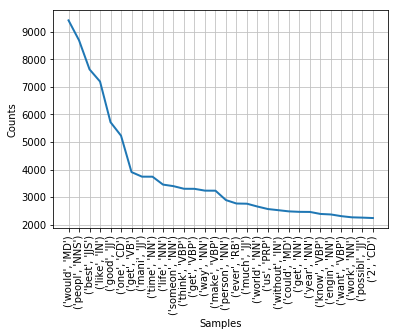

In [517]:
#40 tokens with most occurences
#looks ok
fd1.plot(30)

In [523]:
#removing tokens with total frequency less than 10 - building single words vocabulary
fd2 = {k:v for k,v in fd1.items() if v > 10}
print(len(fd2))
#leaves us with total of 13260 words

13260


In [524]:
#actual vocabulary
voc_single = list(fd2.keys())

In [527]:
#pickling
file2 = open('voc_single.data', 'wb')
pickle.dump(voc_single, file2)
file2.close()

### Bigrams

In [531]:
bigrams = list(nltk.bigrams(tokens5))

In [534]:
print(bigrams[0:20])
print(len(bigrams))

[(('way', 'NN'), ('play', 'NN')), (('play', 'NN'), ('video', 'FW')), (('video', 'FW'), ('googl', 'NN')), (('googl', 'NN'), ('drive', 'NN')), (('drive', 'NN'), ('vlc', 'NN')), (('vlc', 'NN'), ('media', 'NNS')), (('media', 'NNS'), ('player', 'NN')), (('player', 'NN'), ('android', 'NN')), (('android', 'NN'), ('prefer', 'RB')), (('prefer', 'RB'), ('googl', 'JJ')), (('googl', 'JJ'), ('drive', 'NN')), (('drive', 'NN'), ('video', 'NNS')), (('video', 'NNS'), ('store', 'VBP')), (('store', 'VBP'), ('local', 'RB')), (('local', 'RB'), ('make', 'VBP')), (('make', 'VBP'), ('say', 'VBP')), (('say', 'VBP'), ('certain', 'JJ')), (('certain', 'JJ'), ('date', 'NN')), (('date', 'NN'), ('notif', 'NNS')), (('notif', 'NNS'), ('best', 'JJS'))]
1306066


In [675]:
#calculating how good bigrams are, using chi square
finder = nltk.BigramCollocationFinder.from_words(tokens5)

In [682]:
#using only bigrams with total frequency above 10
finder.apply_freq_filter(10)

In [683]:
#actual chi square scores
scores = finder.score_ngrams(nltk.BigramAssocMeasures.chi_sq)

In [684]:
scores[0:5]

[((('greenlit', 'JJ'), ('backstori', 'JJ')), 1205599.3846069034),
 ((('elon', 'NN'), ('musk', 'NN')), 958538.2378249611),
 ((('myer', 'NNS'), ('brigg', 'VBP')), 725588.3332993039),
 ((('stormi', 'NN'), ('daniel', 'NNS')), 687398.9473321527),
 ((('pro', 'NNS'), ('con', 'NNS')), 662381.2550300503)]

In [685]:
#only 4922 bigrams appear more than 10 times
len(scores)

4922

In [686]:
#plotting bigram collocation strengths
xs = []
for i in scores:
    xs.append(i[1])

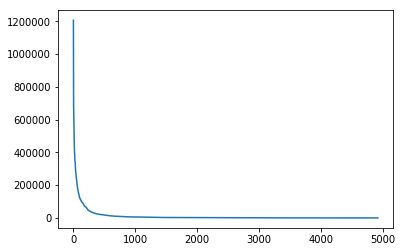

In [736]:
#it is difficult to see much from this graph
plt.plot(np.arange(0,len(scores)),xs)

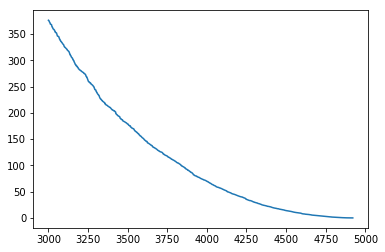

In [737]:
#scaling down
plt.plot(np.arange(3000,len(scores)),xs[3000:])
#all these still have relatively high chi square score, based on degrees of freedom = 1

In [742]:
#printing last 100 to see if they make sense
for i in scores[-100:-1]:
    print(i[0])
#they seem ok more or less
#so i will put all bigrams with frequency greater than 10 into bigram vocabulary

(('peopl', 'NNS'), ('bad', 'JJ'))
(('person', 'NN'), ('think', 'VBP'))
(('good', 'JJ'), ('life', 'NN'))
(('life', 'NN'), ('time', 'NN'))
(('think', 'VBP'), ('like', 'IN'))
(('countri', 'NN'), ('one', 'CD'))
(('manag', 'NN'), ('would', 'MD'))
(('student', 'NN'), ('best', 'JJS'))
(('good', 'JJ'), ('money', 'NN'))
(('like', 'IN'), ('want', 'VBP'))
(('student', 'NN'), ('would', 'MD'))
(('peopl', 'NNS'), ('high', 'JJ'))
(('much', 'JJ'), ('one', 'CD'))
(('india', 'NN'), ('peopl', 'NNS'))
(('like', 'IN'), ('know', 'VBP'))
(('would', 'MD'), ('differ', 'JJ'))
(('sex', 'NN'), ('would', 'MD'))
(('make', 'VBP'), ('one', 'CD'))
(('peopl', 'NNS'), ('life', 'NN'))
(('time', 'NN'), ('think', 'VBP'))
(('like', 'IN'), ('ever', 'RB'))
(('know', 'VBP'), ('best', 'JJS'))
(('like', 'IN'), ('5', 'CD'))
(('peopl', 'NNS'), ('black', 'JJ'))
(('get', 'VB'), ('best', 'JJS'))
(('time', 'NN'), ('one', 'CD'))
(('peopl', 'NNS'), ('money', 'NN'))
(('us', 'PRP'), ('peopl', 'NNS'))
(('ever', 'RB'), ('time', 'NN'))
(('li

In [743]:
voc_bigrams = []
for i in scores:
    voc_bigrams.append(i[0])
file3 = open('voc_bigrams', 'wb')
pickle.dump(voc_bigrams, file3)
file3.close()

### Trigrams

In [744]:
trigrams = list(nltk.trigrams(tokens5))

In [746]:
print(trigrams[0:20])
print(len(trigrams))

[(('way', 'NN'), ('play', 'NN'), ('video', 'FW')), (('play', 'NN'), ('video', 'FW'), ('googl', 'NN')), (('video', 'FW'), ('googl', 'NN'), ('drive', 'NN')), (('googl', 'NN'), ('drive', 'NN'), ('vlc', 'NN')), (('drive', 'NN'), ('vlc', 'NN'), ('media', 'NNS')), (('vlc', 'NN'), ('media', 'NNS'), ('player', 'NN')), (('media', 'NNS'), ('player', 'NN'), ('android', 'NN')), (('player', 'NN'), ('android', 'NN'), ('prefer', 'RB')), (('android', 'NN'), ('prefer', 'RB'), ('googl', 'JJ')), (('prefer', 'RB'), ('googl', 'JJ'), ('drive', 'NN')), (('googl', 'JJ'), ('drive', 'NN'), ('video', 'NNS')), (('drive', 'NN'), ('video', 'NNS'), ('store', 'VBP')), (('video', 'NNS'), ('store', 'VBP'), ('local', 'RB')), (('store', 'VBP'), ('local', 'RB'), ('make', 'VBP')), (('local', 'RB'), ('make', 'VBP'), ('say', 'VBP')), (('make', 'VBP'), ('say', 'VBP'), ('certain', 'JJ')), (('say', 'VBP'), ('certain', 'JJ'), ('date', 'NN')), (('certain', 'JJ'), ('date', 'NN'), ('notif', 'NNS')), (('date', 'NN'), ('notif', 'NNS'

In [778]:
finder2 = nltk.TrigramCollocationFinder.from_words(tokens5)

In [779]:
#using only trigrams with total frequency above 5
# reducing this number to keep more trigrams, since they offer some info on word order
# bad ones will be eliminated by chi-square
finder2.apply_freq_filter(5)

In [780]:
#using pmi since chi sq has some error i cant find in documentation or forums
scores2 = finder2.score_ngrams(nltk.TrigramAssocMeasures.chi_sq)

In [781]:
len(scores2)

1129

In [782]:
#they mostly make sense, although there are some issues - kim jong un
scores2[0:30]

[((('bhk', 'NN'), ('flat', 'NNS'), ('rent', 'VBP')), 24007713138.078873),
 ((('uefa', 'JJ'), ('champion', 'NNS'), ('leagu', 'VBP')), 10824313726.651344),
 ((('stand', 'VBG'), ('tradit', 'NNS'), ('undergradu', 'NNS')),
  4522454933.333738),
 ((('kim', 'NN'), ('jong', 'NN'), ('un', 'JJ')), 3423475941.4013624),
 ((('georg', 'NN'), ('w', 'VBD'), ('bush', 'JJ')), 3220415086.480294),
 ((('kim', 'VB'), ('jong', 'JJ'), ('un', 'JJ')), 2779194103.6445336),
 ((('greenlit', 'JJ'), ('backstori', 'JJ'), ('movi', 'NN')),
  1922582144.6330757),
 ((('asp', 'JJ'), ('net', 'JJ'), ('mvc', 'NN')), 1607334244.6551964),
 ((('bit', 'NNS'), ('pilani', 'VBP'), ('pilani', 'JJ')), 1099627538.6877294),
 ((('kim', 'VBP'), ('jong', 'JJ'), ('un', 'JJ')), 1072082664.5234003),
 ((('tourist', 'JJ'), ('spot', 'NNS'), ('visit', 'VBP')), 935084711.4136411),
 ((('math', 'NN'), ('displaystyl', 'NN'), ('int_', 'VBZ')), 923166493.3002375),
 ((('appl', 'NN'), ('cider', 'NN'), ('vinegar', 'NN')), 837760973.4342791),
 ((('competi

In [783]:
#plotting chis
xs2 = []
for i in scores2:
    xs2.append(i[1])

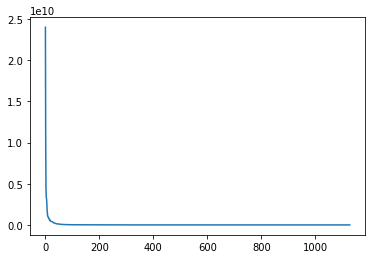

In [784]:
plt.plot(np.arange(0,len(scores2)), xs2)

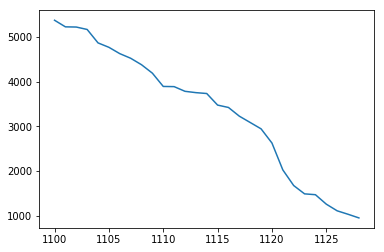

In [791]:
#rescaling
plt.plot(np.arange(1100,len(scores2)), xs2[1100:])

In [793]:
#all trigrams have very high chi2 scores, so keeping all of them if they make sense seems ok
#checking sense
for i in scores2[-100:-1]:
    print(i[0])
# i will keep all of them

(('two', 'CD'), ('differ', 'JJ'), ('thing', 'NNS'))
(('3', 'CD'), ('1', 'CD'), ('2', 'CD'))
(('good', 'JJ'), ('book', 'NNS'), ('learn', 'VBP'))
(('look', 'NN'), ('like', 'IN'), ('best', 'JJS'))
(('one', 'CD'), ('get', 'NN'), ('rid', 'JJ'))
(('everi', 'DT'), ('day', 'NN'), ('life', 'NN'))
(('money', 'NN'), ('onlin', 'NN'), ('without', 'IN'))
(('mani', 'JJ'), ('peopl', 'NNS'), ('ask', 'VBP'))
(('student', 'NN'), ('get', 'VB'), ('job', 'NN'))
(('experi', 'NN'), ('2', 'CD'), ('year', 'NNS'))
(('peopl', 'NNS'), ('act', 'VBP'), ('like', 'IN'))
(('peopl', 'NNS'), ('still', 'RB'), ('believ', 'VBP'))
(('first', 'JJ'), ('year', 'NN'), ('engin', 'NN'))
(('much', 'JJ'), ('money', 'NN'), ('would', 'MD'))
(('best', 'JJS'), ('place', 'NN'), ('find', 'VBP'))
(('10', 'CD'), ('3', 'CD'), ('1', 'CD'))
(('1', 'CD'), ('2', 'CD'), ('2', 'CD'))
(('real', 'JJ'), ('life', 'NN'), ('would', 'MD'))
(('3', 'CD'), ('2', 'CD'), ('3', 'CD'))
(('mani', 'JJ'), ('peopl', 'NNS'), ('quora', 'VBP'))
(('best', 'JJS'), ('boo

In [794]:
# trigram final vocabulary
voc_trigrams = []
for i in scores2:
    voc_trigrams.append(i[0])

In [796]:
file4 = open('voc_trigrams', 'wb')
pickle.dump(voc_trigrams, file4)
file4.close()

In [798]:
# complete vocabulary
voc_complete = []
for i in voc_single:
    voc_complete.append(i)
for i in voc_bigrams:
    voc_complete.append(i)
for i in voc_trigrams:
    voc_complete.append(i)

In [800]:
#19311 features are not really that much
len(voc_complete)

19311

In [801]:
file5 = open('voc_complete', 'wb')
pickle.dump(voc_complete, file5)
file5.close()